# 1.Exploratory Data Analysis

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. In this notebook we will download datasets that is related to realtime streaming of click data, such as click information and session data, from [data source](https://github.com/hortonworks/fieldeng-modern-clickstream). Two additional tasks to do here are to explore data for understanding what is in the dataset and its characteristics using famous package pandas, and then to plot the number of clicks per page to find trends or cyclic patterns.

## Table Of Contents
* 1) unzipping compressed files
* 2) Exploring data

Import the libraries related to data exploration and preparation that are used in this lesson.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1) Unzipping compressed files

For this exercise, we use the clickstream dataset from [here](https://github.com/hortonworks/fieldeng-modern-clickstream). 

In [2]:
data_dir='data'
!gzip -d $data_dir/*.gz

## 2) Exploring data

To begin, use Pandas to read the CSV and to show a sample of the data. The clickstream occured every few seconds to March 1st, 2012 to March 15th, 2012. We will define the problem to analyze clicks in the arbitarry time window.  
We will count:
- the number of urls(pages) that users visited
- the number of users
- the number of clicks

In [3]:
clickstream = pd.read_csv(data_dir + '/clickstream-feed-generated.tsv', header=None, delimiter='|')
clickstream.columns = ['clickstream_id','timestamp','IP address','url','is_purchased','is_page_errored','user_session_id','city','state','country']
clickstream['timestamp'] = clickstream['timestamp'].astype('datetime64')
clickstream.set_index('timestamp', inplace=True)
clickstream.head(5)

,clickstream_id,IP address,url,is_purchased,is_page_errored,user_session_id,city,state,country
timestamp,,,,,,,,,
2012-03-01 00:00:19,1330588819,147.222.227.200,http://www.RL.com/,0,0.00000,AF8A0FDF-B1F8-474C-8CD7-8CA06A8E435B,spokane,wa,usa
2012-03-01 00:00:25,1330588825,99.49.96.163,http://www.RL.com/product/4004,0,1.00000,C9183A22-6E1D-4147-BDC9-D634FC957098,detroit,mi,usa
2012-03-01 00:00:27,1330588827,147.222.227.200,http://www.RL.com/,0,0.00000,AF8A0FDF-B1F8-474C-8CD7-8CA06A8E435B,spokane,wa,usa
2012-03-01 00:00:57,1330588857,69.114.3.205,http://www.RL.com/product/4004,0,0.00000,F761B842-9DDA-42CC-9F28-A6359B6C7219,east northport,ny,usa
2012-03-01 00:00:59,1330588859,71.217.29.209,http://www.RL.com/review/3004,0,0.59596,6FE1CB72-95C9-47F9-A1CB-7295C927F916,tacoma,wa,usa


In [4]:
filtered_clickstream = clickstream[['user_session_id', 'url', 'clickstream_id']].groupby(['url', 'timestamp','user_session_id']).count().reset_index()
filtered_clickstream

,url,timestamp,user_session_id,clickstream_id
0,http://www.RL.com/,2012-03-01 00:00:19,AF8A0FDF-B1F8-474C-8CD7-8CA06A8E435B,1
1,http://www.RL.com/,2012-03-01 00:00:27,AF8A0FDF-B1F8-474C-8CD7-8CA06A8E435B,1
2,http://www.RL.com/,2012-03-01 00:01:21,AF8A0FDF-B1F8-474C-8CD7-8CA06A8E435B,1
3,http://www.RL.com/,2012-03-01 00:01:30,60C8049D-C1A2-41C2-B503-6C1200424C49,1
4,http://www.RL.com/,2012-03-01 00:01:45,F761B842-9DDA-42CC-9F28-A6359B6C7219,1
...,...,...,...,...
397936,http://www.RL.com/video/1003,2012-03-15 23:52:13,632959ED-DE61-43E4-A9BC-0F8E1AA6B070,1
397937,http://www.RL.com/video/1003,2012-03-15 23:52:26,A30C1420-DF86-DABF-50CA-F490E9338E95,1
397938,http://www.RL.com/video/1003,2012-03-15 23:53:34,A30C1420-DF86-DABF-50CA-F490E9338E95,1
397939,http://www.RL.com/video/1003,2012-03-15 23:54:30,3C9AB6C3-D275-4AA1-8BA3-CE401DBD1E98,1



There are 16 unique pages in the dataset.

In [5]:
urls = filtered_clickstream['url'].unique()
urls

array(['http://www.RL.com/', 'http://www.RL.com/product/4001',
       'http://www.RL.com/product/4002', 'http://www.RL.com/product/4003',
       'http://www.RL.com/product/4004', 'http://www.RL.com/product/4005',
       'http://www.RL.com/reco/2001', 'http://www.RL.com/reco/2002',
       'http://www.RL.com/review/3001', 'http://www.RL.com/review/3002',
       'http://www.RL.com/review/3003', 'http://www.RL.com/review/3004',
       'http://www.RL.com/review/3005', 'http://www.RL.com/video/1001',
       'http://www.RL.com/video/1002', 'http://www.RL.com/video/1003'],
      dtype=object)

Aggregate the clickstream_id and user_session_id in each 10 minutes, and then count them by url.

In [6]:
for index, url in enumerate(urls):
    agg_click_users = filtered_clickstream[filtered_clickstream['url'] == url].set_index('timestamp').resample('10T')
    clicks = agg_click_users.sum()['clickstream_id']
    users  = agg_click_users.nunique()['user_session_id']
    stream = pd.concat([clicks, users], axis=1)
    stream['url'] = url
    stream = stream[['url', 'clickstream_id', 'user_session_id']]
    try:
        streams
    except NameError:
        streams = stream
    else: 
        streams = pd.concat([streams,stream])
streams

,url,clickstream_id,user_session_id
timestamp,,,
2012-03-01 00:00:00,http://www.RL.com/,24,13
2012-03-01 00:10:00,http://www.RL.com/,22,14
2012-03-01 00:20:00,http://www.RL.com/,20,8
2012-03-01 00:30:00,http://www.RL.com/,17,9
2012-03-01 00:40:00,http://www.RL.com/,15,8
...,...,...,...
2012-03-15 23:10:00,http://www.RL.com/video/1003,6,4
2012-03-15 23:20:00,http://www.RL.com/video/1003,3,3
2012-03-15 23:30:00,http://www.RL.com/video/1003,6,5


As one of the most insightful parts of exploratory data analysis, we plot the dataset according to timestamp. Clicks show similar trends and cyclic patterns on each page. We replace urls to **page_[0,1,2,...n]** for preparing training dataset. 

In [7]:
revised_url = []
for i, url in enumerate(urls):
    revised_url.append('page_'+str(i))

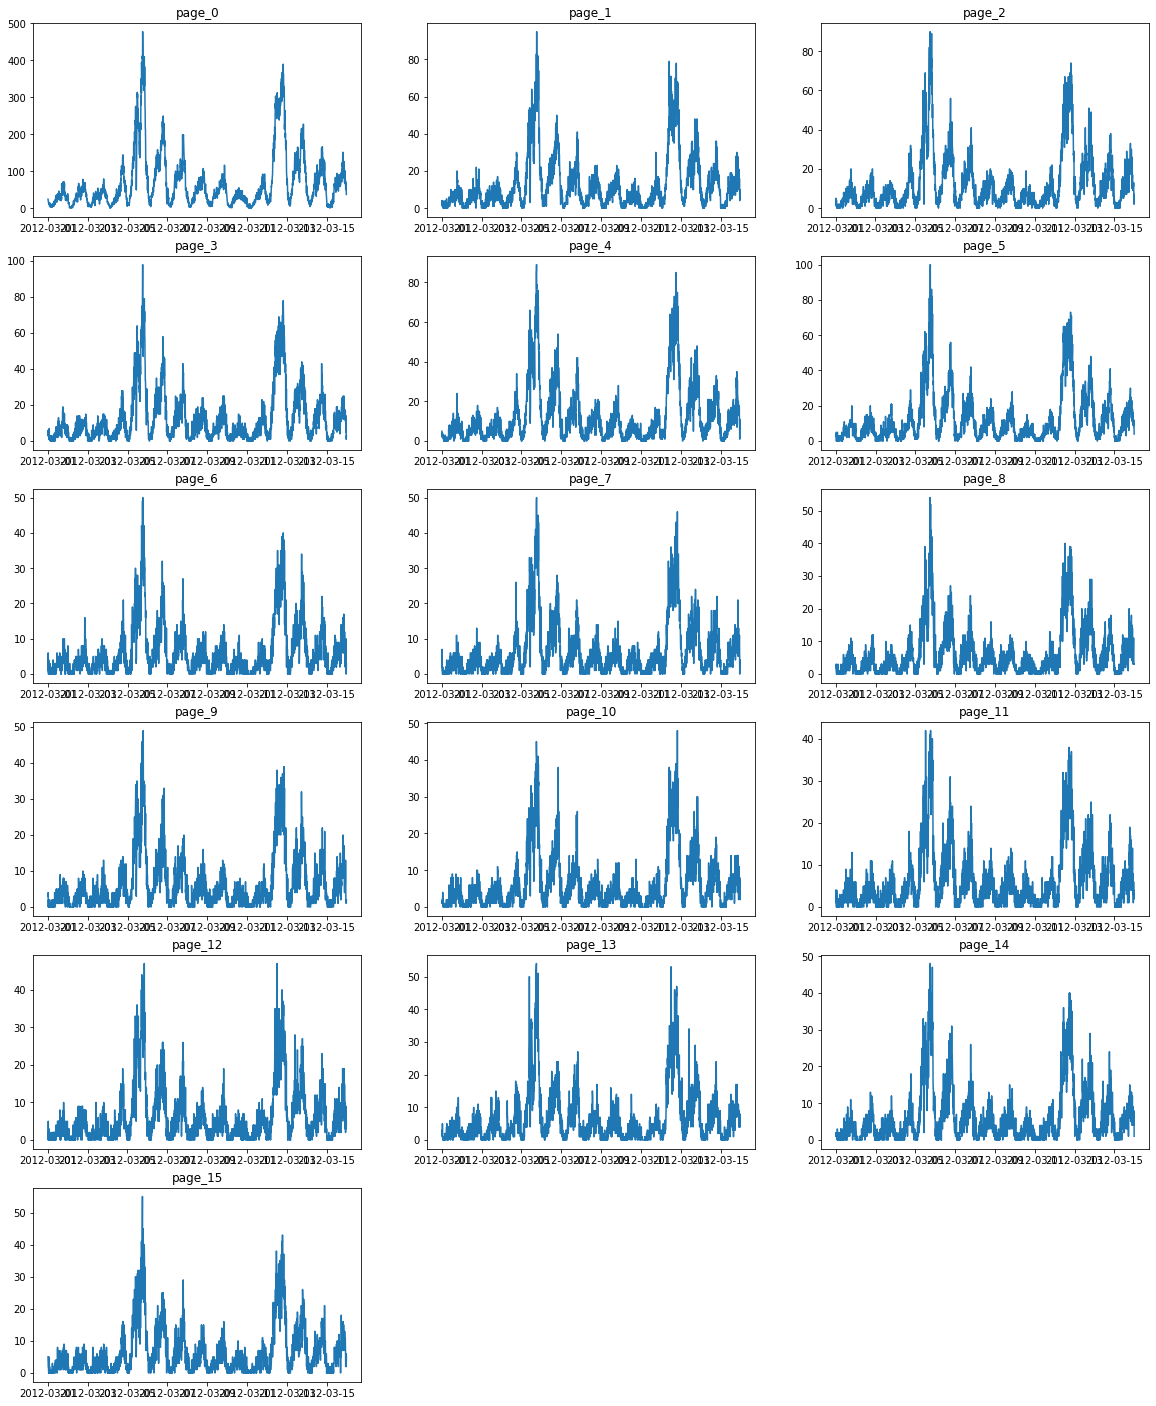

In [8]:
plt.figure(figsize=(20,25))
for index, url in enumerate(urls):
    agg_click_users = filtered_clickstream[filtered_clickstream['url'] == url].set_index('timestamp').resample('10T')
    plt.subplot(6,3, index+1)
    plt.plot(agg_click_users.sum()['clickstream_id'])
    plt.title(revised_url[index])
    

We will use some of varialbes in the following notebooks

In [9]:
%store urls revised_url filtered_clickstream streams

Stored 'urls' (ndarray)
Stored 'revised_url' (list)
Stored 'filtered_clickstream' (DataFrame)
Stored 'streams' (DataFrame)
